In [2]:
#SET UP
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "../Resources/mousedrug_data.csv"
clinical_trial_data = "../Resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data)
clinical_trial = pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset
combined_data = pd.merge (clinical_trial, mouse_drug, how='left', on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [3]:
#TUMOR RESPONSE TO TREATMENT

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_avg = combined_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()
tumor_volume_avg

# Convert to DataFrame
tumor_volume_avg_df = pd.DataFrame(tumor_volume_avg)

# Preview DataFrame
tumor_volume_avg_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_stderr = combined_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()
tumor_volume_stderr

# Convert to DataFrame
tumor_volume_stderr_df = pd.DataFrame(tumor_volume_stderr)

# Preview DataFrame
tumor_volume_stderr_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
formatted_tumor_volume_avg = tumor_volume_avg_df.pivot_table (values = "Tumor Volume (mm3)", 
                                                             index = "Timepoint", 
                                                             columns = "Drug")

formatted_tumor_volume_stderr = tumor_volume_stderr_df.pivot_table (values = "Tumor Volume (mm3)", 
                                                             index = "Timepoint", 
                                                             columns = "Drug")

# Preview that Reformatting worked
formatted_tumor_volume_avg.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


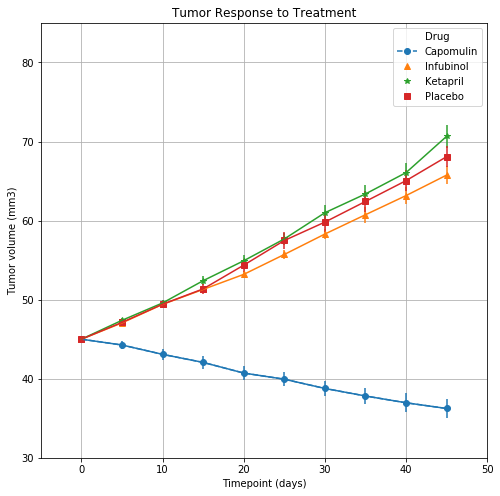

In [6]:
# Generate the Plot (with Error Bars)
tv_avg_table = formatted_tumor_volume_avg[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
tv_stderr_table = formatted_tumor_volume_stderr[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

ax = tv_avg_table.plot (yerr = tv_stderr_table, figsize = (8,8), legend = False)
ax.set_prop_cycle(None)
tv_avg_table.plot(style=['o--', '^', '*', 's'], ax = ax)


plt.title("Tumor Response to Treatment")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor volume (mm3)")

plt.xlim(-5, 50)
plt.ylim(30, 85)

plt.grid()

# Save the Figure
plt.savefig("tumor_treatment_response.png")
plt.show()

In [7]:
#METASTATIC RESPONSE TO TREATMENT
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
ms_data_avg = combined_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
ms_data_avg.head()

# Convert to DataFrame
ms_data_avg_df = pd.DataFrame(ms_data_avg)

# Preview DataFrame
ms_data_avg_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
ms_data_stderr = combined_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()
ms_data_stderr.head()

# Convert to DataFrame
ms_data_stderr_df = pd.DataFrame(ms_data_stderr)

# Preview DataFrame
ms_data_stderr_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
formatted_ms_data_avg = ms_data_avg_df.pivot_table (values = "Metastatic Sites", 
                                                             index = "Timepoint", 
                                                             columns = "Drug")

formatted_ms_data_stderr = ms_data_stderr_df.pivot_table (values = "Metastatic Sites", 
                                                             index = "Timepoint", 
                                                             columns = "Drug")
# Preview that Reformatting worked
formatted_ms_data_avg.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


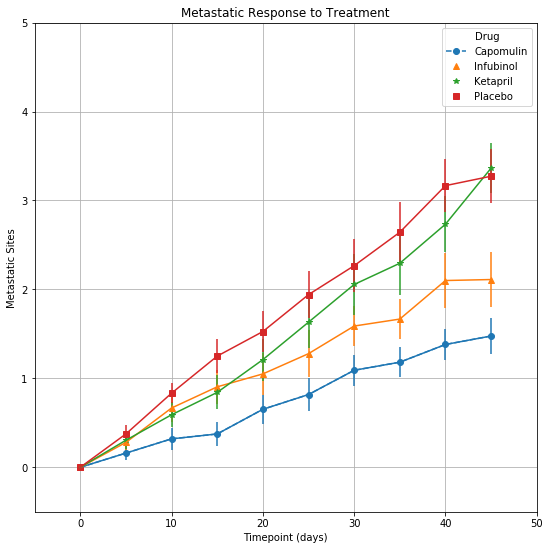

In [10]:
# Generate the Plot (with Error Bars)
ms_avg_table = formatted_ms_data_avg[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
ms_stderr_table = formatted_ms_data_stderr[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

ax = ms_avg_table.plot (yerr = ms_stderr_table, figsize = (9,9), legend = False)
ax.set_prop_cycle(None)
ms_avg_table.plot(style=['o--', '^', '*', 's'], ax = ax)


plt.title("Metastatic Response to Treatment")
plt.xlabel("Timepoint (days)")
plt.ylabel("Metastatic Sites")

plt.xlim(-5, 50)
plt.ylim(-0.5, 5)

plt.grid()

# Save the Figure
plt.savefig("metastatic_treatment_response.png")
plt.show()

In [11]:
#SURVIVAL RATES
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combined_data.groupby(['Drug','Timepoint'])['Mouse ID'].count().reset_index()

# Convert to DataFrame
mice_count_df =  pd.DataFrame (mice_count)

# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [18]:
# Minor Data Munging to Re-Format the Data Frames
formatted_mice_count = mice_count_df.pivot_table (values = "Mouse ID", 
                                                             index = "Timepoint", 
                                                             columns = "Drug")
# Preview the Data Frame
formatted_mice_count

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


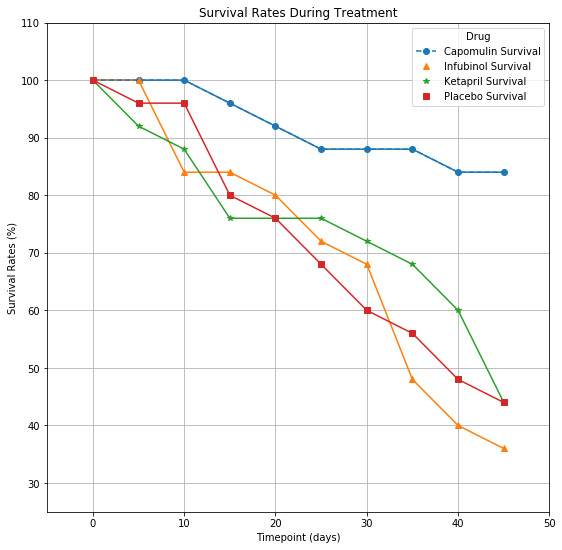

In [13]:
# Generate the Plot (Accounting for percentages)
mice_count_table = formatted_mice_count[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]


mice_count_table ['Capomulin Survival'] = (mice_count_table ['Capomulin']/25)*100
mice_count_table ['Infubinol Survival'] = (mice_count_table ['Infubinol']/25)*100
mice_count_table ['Ketapril Survival'] = (mice_count_table ['Ketapril']/25)*100
mice_count_table ['Placebo Survival'] = (mice_count_table ['Placebo']/25)*100

survival_rates = mice_count_table[['Capomulin Survival', 'Infubinol Survival', 'Ketapril Survival', 
                                   'Placebo Survival']]

ax = survival_rates.plot (figsize = (9,9), legend = False)
ax.set_prop_cycle(None)
survival_rates.plot(style=['o--', '^', '*', 's'], ax = ax)


plt.title("Survival Rates During Treatment")
plt.xlabel("Timepoint (days)")
plt.ylabel("Survival Rates (%)")

plt.xlim(-5, 50)
plt.ylim(25, 110)

plt.grid()

# Save the Figure
plt.savefig("survival_rates_treatment.png")

# Show the Figure
plt.show()

In [14]:
#SUMMARY BAR GRAPH
# Calculate the percent changes for each drug
formatted_tumor_volume_avg ['Capomulin tumor'] = ((formatted_tumor_volume_avg ['Capomulin']/45)*100)-100
formatted_tumor_volume_avg ['Infubinol tumor'] = ((formatted_tumor_volume_avg ['Infubinol']/45)*100)-100
formatted_tumor_volume_avg ['Ketapril tumor'] = ((formatted_tumor_volume_avg ['Ketapril']/45)*100)-100
formatted_tumor_volume_avg ['Naftisol tumor'] = ((formatted_tumor_volume_avg ['Naftisol']/45)*100)-100
formatted_tumor_volume_avg ['Placebo tumor'] = ((formatted_tumor_volume_avg ['Placebo']/45)*100)-100
formatted_tumor_volume_avg ['Propriva tumor'] = ((formatted_tumor_volume_avg ['Propriva']/45)*100)-100
formatted_tumor_volume_avg ['Ramicane tumor'] = ((formatted_tumor_volume_avg ['Ramicane']/45)*100)-100
formatted_tumor_volume_avg ['Stelasyn tumor'] = ((formatted_tumor_volume_avg ['Stelasyn']/45)*100)-100
formatted_tumor_volume_avg ['Zoniferol tumor'] = ((formatted_tumor_volume_avg ['Zoniferol']/45)*100)-100

tumor_vol_change = formatted_tumor_volume_avg [['Capomulin tumor', 'Infubinol tumor', 'Ketapril tumor', 
                                                'Naftisol tumor', 'Placebo tumor', 'Propriva tumor', 
                                                'Ramicane tumor', 'Stelasyn tumor', 'Zoniferol tumor']]
tumor_vol_change = tumor_vol_change.rename(columns={'Capomulin tumor':'Capomulin', 'Infubinol tumor':'Infubinol', 
                                                    'Ketapril tumor':'Ketapril', 'Naftisol tumor':'Naftisol', 
                                                    'Placebo tumor':'Placebo', 'Propriva tumor':'Propriva', 
                                                    'Ramicane tumor':'Ramicane', 'Stelasyn tumor':'Stealsyn', 
                                                    'Zoniferol tumor':'Zoniferol'})

# Display the data to confirm
tumor_vol_change.loc[45, :]


Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stealsyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

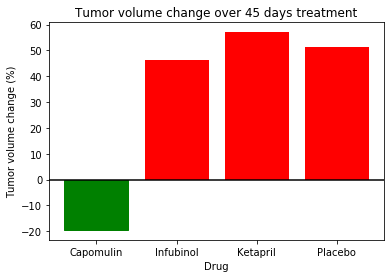

In [17]:
# Store all Relevant Percent Changes into a Tuple
tumor_change = tumor_vol_change[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
tumor_change_df = pd.DataFrame(tumor_change.loc[45, :])
tumor_change_df = tumor_change_df.rename(columns={45:'Tumor Volume Change (%)'})

a = tumor_change_df.index.values.tolist()
b = list(tumor_change_df['Tumor Volume Change (%)'])

ax = plt.bar(a, b, facecolor="red")
ax[0].set_color('g')
plt.ylabel("Tumor volume change (%)")
plt.xlabel("Drug")
plt.title("Tumor volume change over 45 days treatment")
plt.axhline(0, color='black')

# Save the Figure
plt.savefig("tumor_vol_change.png")

# Show the Figure
plt.show()


OBSERVATIONS

1) Capomulin is clearly the most successful drug based on the data we have analyzed over. Over the course of the 45 days, Capomulin sustained the highest survival rates.

2) Infubinol, Ketapril, and Placebo drugs all trended very similar to each other when analyzing survival rates, tumor response to treatment, and overall tumor change. Would be interested to see what the drugs consist of to confirm if the drug components are similar. 

3) Infubinol seems to have the worst results when looking at the survival rates of the tested mice. At the 45th day mark, less than 40% of the 25 mice survived.
